<a href="https://colab.research.google.com/github/Wayne122/CMPE257/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE257 Midterm

Han-Wei Lin

I'm trying to find out the higher value houses and the houses that are best for renting

## Checking local environment

In [ ]:
import sys
sys.executable

'/home/waynelin/temp/cmpe257/venv-257/bin/python'

In [ ]:
!jupyter kernelspec list

Available kernels:
  python3    /home/waynelin/temp/cmpe257/venv-257/share/jupyter/kernels/python3


## Data Preparation

### Import Libraries

In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
!pip install pandas
!pip install -U scikit-learn scipy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Requirement already up-to-date: scikit-learn in ./venv-257/lib/python3.8/site-packages (0.23.2)
Requirement already up-to-date: scipy in ./venv-257/lib/python3.8/site-packages (1.5.3)
Requirement already up-to-date: matplotlib in ./venv-257/lib/python3.8/site-packages (3.3.2)


### Import Data

In [ ]:
#Read the file
df = pd.read_csv('SanDiegoHousing-DatSet.csv')
df

,Listing Pictures,MLS #,Status,Style,Full Address,Zip,Community,MapCoord,Beds,TotB,EstSF,YrBlt,DOMLS,ListPrice,Lst Date,Sold Price,COEDate,Sale/Rent,Vacation Rental By Owner
0,http://cdnparap00.paragonrels.com/ParagonImage...,180045508,ACT,ATT,4095 Bonita Road 132,91902,BONT,NaN,2,2,"1,007",1970,3,"$310,000",8/15/18,NaN,NaN,For Sale,NaN
1,http://cdnparap00.paragonrels.com/ParagonImage...,180024056,ACT,TOWNH,88 Fourth Ave 10,91910,CV,1310A5,3,2,"1,611",2004,104,"$399,900",5/6/18,NaN,NaN,For Sale,NaN
2,http://cdnparap00.paragonrels.com/ParagonImage...,180035693,ACT,ATT,2167 Palo Alto Dr 133,91914,CV,1311D2,2,2,"1,061",2006,50,"$374,000",6/29/18,NaN,NaN,For Sale,NaN
3,http://cdnparap00.paragonrels.com/ParagonImage...,180042493,ACT,TOWNH,2134 Cantata Dr. 36,91914,CV,NaN,2,2,"1,061",2006,17,"$379,000",7/30/18,NaN,NaN,For Sale,NaN
4,http://cdnparap00.paragonrels.com/ParagonImage...,180038189,ACT,ATT,280 Salinas Dr. 171,91914,CV,NaN,2,2,"1,061",2006,37,"$372,000 - $385,000",7/10/18,NaN,NaN,For Sale,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,http://cdnparap00.paragonrels.com/ParagonImage...,180044441,ACT,TOWNH,7019 DEERHURST CT,92139,PH,NaN,3,2,"1,381",1980,8,"$425,000 - $435,000",8/9/18,NaN,NaN,For Sale,NaN
243,http://cdnparap00.paragonrels.com/ParagonImage...,180044784,ACT,ATT,2233 Manzana Way,92139,PH,NaN,4,3,"1,701",1985,8,"$460,000",8/10/18,NaN,NaN,For Sale,NaN
244,http://cdnparap00.paragonrels.com/ParagonImage...,180040324,ACT,TOWNH,24374 Larchmont Ct 69,92653,OOFA,921G4,2,3,"1,288",1985,28,"$499,000",7/20/18,NaN,NaN,For Sale,NaN
245,http://cdnparap00.paragonrels.com/ParagonImage...,180042450,ACT,ATT,25185 Via Terracina,92677,OOFA,951J1,2,2,"1,113",1989,17,"$515,000",8/1/18,NaN,NaN,For Sale,NaN


### Data preprocess

####Useless column drop

In [ ]:
df.drop(['Listing Pictures', 'MLS #', 'Status', 'Community', 'MapCoord', 'DOMLS', 'Lst Date', 'Sold Price', 'COEDate', 'Sale/Rent', 'Vacation Rental By Owner'], axis=1, inplace=True)

####Figure preprocess

In [ ]:
def ppListPrice(lp):
    tl = lp.split('$')
    if len(tl) == 2:
        p = tl[1].replace(' ', '').replace(',', '')
    elif len(tl) == 3:
        p1 = tl[1].replace(' ', '').replace('-', '').replace(',', '')
        p2 = tl[2].replace(' ', '').replace(',', '')
        p = (int(p1) + int(p2)) // 2

    return int(p)

In [ ]:
df['ListPrice'] = df['ListPrice'].apply(ppListPrice)

In [ ]:
def ppEstSF(esf):
    t = esf.replace(',', '')

    return int(t)

In [ ]:
df['EstSF'] = df['EstSF'].apply(ppEstSF)

### Examine data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Style         247 non-null    object
 1   Full Address  247 non-null    object
 2   Zip           247 non-null    int64 
 3   Beds          247 non-null    int64 
 4   TotB          247 non-null    int64 
 5   EstSF         247 non-null    int64 
 6   YrBlt         247 non-null    int64 
 7   ListPrice     247 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.6+ KB


In [ ]:
df

,Style,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice
0,ATT,4095 Bonita Road 132,91902,2,2,1007,1970,310000
1,TOWNH,88 Fourth Ave 10,91910,3,2,1611,2004,399900
2,ATT,2167 Palo Alto Dr 133,91914,2,2,1061,2006,374000
3,TOWNH,2134 Cantata Dr. 36,91914,2,2,1061,2006,379000
4,ATT,280 Salinas Dr. 171,91914,2,2,1061,2006,378500
...,...,...,...,...,...,...,...,...
242,TOWNH,7019 DEERHURST CT,92139,3,2,1381,1980,430000
243,ATT,2233 Manzana Way,92139,4,3,1701,1985,460000
244,TOWNH,24374 Larchmont Ct 69,92653,2,3,1288,1985,499000
245,ATT,25185 Via Terracina,92677,2,2,1113,1989,515000


### Scrape from Zillow

#### Scraping

In [ ]:
!pip install beautifulsoup4
!pip install lxml

In [ ]:
from bs4 import BeautifulSoup
import requests
import time
import re

In [ ]:
soup_list = []

Code below is suppose to scrape the housing data from Zillow, but it seems like the website is designed to prevent people from scraping it. Even with selenium. It is not about the frequency of me making requests. I waited even for over 5 minutes and I still got blocked.

So I ended up looping the code until I get what I want.

In [ ]:
df['Full Address'][240]

'7076 Attleborough Ct'

In [ ]:
# If blocked, restart from where it started to be blocked
address_set = zip(df['Full Address'][240:], df['Zip'][240:])
#for z1, z2 in address_set:
#    print(z1, z2)
#    break

In [ ]:
site = 'https://www.zillow.com/homes/'

for i1, i2 in address_set:
    while True:
        i = i1.replace('  ', '-').replace(' ', '-') + '-' + str(i2) + '_rb'
        print(site+i)
        # Switch around the User-Agent if blocked: Mozilla/5.0 AppleWebKit/537.36 Chrome/74.0.3729.131 Safari/537.36
        source = requests.get(site+i, headers={'User-Agent': 'Chrome/74.0.3729.131'}).text
        soup = BeautifulSoup(source, 'lxml')
        if not soup.find('meta', attrs={'name':'robots'}): break
        time.sleep(1)
    soup_list.append(soup)
    time.sleep(1)

https://www.zillow.com/homes/7076-Attleborough-Ct-92139_rb
https://www.zillow.com/homes/1886-Manzana-Way-92139_rb
https://www.zillow.com/homes/7019-DEERHURST-CT-92139_rb
https://www.zillow.com/homes/2233-Manzana-Way-92139_rb
https://www.zillow.com/homes/24374-Larchmont-Ct-69-92653_rb
https://www.zillow.com/homes/25185-Via-Terracina-92677_rb
https://www.zillow.com/homes/3575-Cameo-Drive-43-92056_rb


In [ ]:
#soup_list.pop()
len(soup_list)

247

####Save soup list

In [ ]:
from zipfile import ZipFile
import os

In [ ]:
with ZipFile('soup_list.zip', 'w') as myzip:
    for i, one_soup in enumerate(soup_list):
        with open(f'{str(i)}.html', 'w') as hfile:
            hfile.write(str(one_soup))
        myzip.write(f'{str(i)}.html')
        os.remove(f'{str(i)}.html')

####Load soup list (if needed)

In [ ]:
soup_list = []
with ZipFile('soup_list.zip', 'r') as myzip:
    for i in range(247):
        with myzip.open(f'{str(i)}.html', 'r') as hfile:
            one_soup = BeautifulSoup(hfile.read(), "lxml")
        soup_list.append(one_soup)

####Get HOA

In [ ]:
HOA_list = []
for s in soup_list:
    for tt in s.find_all("span", class_='Text-aiai24-0 gbgvjX'):
        result = re.match(r"^(\$)([0-9]+)(/mo)$", tt.text)
        if result:
            HOA_list.append(int(result.group(2)))
            break
    else:
        HOA_list.append(0)

In [ ]:
HOA_list

####Get Rent

In [ ]:
Rent_list = []
for s in soup_list:
    for tt in s.find_all("span", class_='Text-aiai24-0 bBtYeM'):
        result = re.match(r"^(\$)([0-9]{1}),{1}([0-9]+)", tt.text)
        if result:
            Rent_list.append(int(result.group(2)+result.group(3)))
            break
    else:
        Rent_list.append(None)

In [ ]:
Rent_list

####Get Mortgage

Because not all entities have the mortgage on their page, I had to calculate it myself.

In [ ]:
Mortgage_list = []
interest_rate = 0.029
monthly_ir = interest_rate / 12

for s in soup_list:
    for tt in s.find_all("div", class_='zestimate-value'):
        result = re.match(r"^(\$)([0-9]+,{1})*[0-9]+", tt.text)
        if result:
            monthly_M = int(result.group().replace('$', '').replace(',', ''))
            monthly_M *= 0.8
            monthly_M = (monthly_ir / (1-((1+monthly_ir)**-360))) * monthly_M
            Mortgage_list.append(int(monthly_M))
            break
    else:
        Mortgage_list.append(None)

In [ ]:
Mortgage_list

####Add these new columns to orignal data

In [ ]:
df['HOA'] = HOA_list
df['Rent'] = Rent_list
df['Mortgage'] = Mortgage_list

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         247 non-null    object 
 1   Full Address  247 non-null    object 
 2   Zip           247 non-null    int64  
 3   Beds          247 non-null    int64  
 4   TotB          247 non-null    int64  
 5   EstSF         247 non-null    int64  
 6   YrBlt         247 non-null    int64  
 7   ListPrice     247 non-null    int64  
 8   HOA           247 non-null    int64  
 9   Rent          183 non-null    float64
 10  Mortgage      181 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 21.4+ KB


Drop null

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 246
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         181 non-null    object 
 1   Full Address  181 non-null    object 
 2   Zip           181 non-null    int64  
 3   Beds          181 non-null    int64  
 4   TotB          181 non-null    int64  
 5   EstSF         181 non-null    int64  
 6   YrBlt         181 non-null    int64  
 7   ListPrice     181 non-null    int64  
 8   HOA           181 non-null    int64  
 9   Rent          181 non-null    float64
 10  Mortgage      181 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 17.0+ KB


####Calculate the benefit and add it back to the dataset

In [ ]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,Style,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage
0,ATT,4095 Bonita Road 132,91902,2,2,1007,1970,310000,470,1950.0,1087.0
1,TOWNH,88 Fourth Ave 10,91910,3,2,1611,2004,399900,320,2550.0,1456.0
2,ATT,2167 Palo Alto Dr 133,91914,2,2,1061,2006,374000,127,2200.0,1394.0
3,TOWNH,2134 Cantata Dr. 36,91914,2,2,1061,2006,379000,358,2200.0,1356.0
4,ATT,280 Salinas Dr. 171,91914,2,2,1061,2006,378500,125,2240.0,1349.0
...,...,...,...,...,...,...,...,...,...,...,...
176,TOWNH,7019 DEERHURST CT,92139,3,2,1381,1980,430000,134,2500.0,1524.0
177,ATT,2233 Manzana Way,92139,4,3,1701,1985,460000,235,2750.0,1690.0
178,TOWNH,24374 Larchmont Ct 69,92653,2,3,1288,1985,499000,320,2600.0,1590.0
179,ATT,25185 Via Terracina,92677,2,2,1113,1989,515000,310,2550.0,1803.0


In [ ]:
benefit_list = []
for i in df.iterrows():
    benefit_list.append( i[1]['Rent'] - i[1]['HOA'] - i[1]['Mortgage'] )

In [ ]:
benefit_list

####Add benefit column to dataset

In [ ]:
df['Benefit'] = benefit_list

In [ ]:
df

,Style,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit
0,ATT,4095 Bonita Road 132,91902,2,2,1007,1970,310000,470,1950.0,1087.0,393.0
1,TOWNH,88 Fourth Ave 10,91910,3,2,1611,2004,399900,320,2550.0,1456.0,774.0
2,ATT,2167 Palo Alto Dr 133,91914,2,2,1061,2006,374000,127,2200.0,1394.0,679.0
3,TOWNH,2134 Cantata Dr. 36,91914,2,2,1061,2006,379000,358,2200.0,1356.0,486.0
4,ATT,280 Salinas Dr. 171,91914,2,2,1061,2006,378500,125,2240.0,1349.0,766.0
...,...,...,...,...,...,...,...,...,...,...,...,...
176,TOWNH,7019 DEERHURST CT,92139,3,2,1381,1980,430000,134,2500.0,1524.0,842.0
177,ATT,2233 Manzana Way,92139,4,3,1701,1985,460000,235,2750.0,1690.0,825.0
178,TOWNH,24374 Larchmont Ct 69,92653,2,3,1288,1985,499000,320,2600.0,1590.0,690.0
179,ATT,25185 Via Terracina,92677,2,2,1113,1989,515000,310,2550.0,1803.0,437.0


## Clustering

### Apply GMM clustering on the data

In [ ]:
df = pd.concat([pd.get_dummies(df['Style']), df], axis=1)
df.drop(['Style'], axis=1, inplace=True)
df

,ATT,TOWNH,TWINH,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit
0,1,0,0,4095 Bonita Road 132,91902,2,2,1007,1970,310000,470,1950.0,1087.0,393.0
1,0,1,0,88 Fourth Ave 10,91910,3,2,1611,2004,399900,320,2550.0,1456.0,774.0
2,1,0,0,2167 Palo Alto Dr 133,91914,2,2,1061,2006,374000,127,2200.0,1394.0,679.0
3,0,1,0,2134 Cantata Dr. 36,91914,2,2,1061,2006,379000,358,2200.0,1356.0,486.0
4,1,0,0,280 Salinas Dr. 171,91914,2,2,1061,2006,378500,125,2240.0,1349.0,766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0,1,0,7019 DEERHURST CT,92139,3,2,1381,1980,430000,134,2500.0,1524.0,842.0
177,1,0,0,2233 Manzana Way,92139,4,3,1701,1985,460000,235,2750.0,1690.0,825.0
178,0,1,0,24374 Larchmont Ct 69,92653,2,3,1288,1985,499000,320,2600.0,1590.0,690.0
179,1,0,0,25185 Via Terracina,92677,2,2,1113,1989,515000,310,2550.0,1803.0,437.0


In [ ]:
from sklearn.mixture import GaussianMixture
import itertools

In [ ]:
X

,ATT,TOWNH,TWINH,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit
0,1,0,0,91902,2,2,1007,1970,310000,470,1950.0,1087.0,393.0
1,0,1,0,91910,3,2,1611,2004,399900,320,2550.0,1456.0,774.0
2,1,0,0,91914,2,2,1061,2006,374000,127,2200.0,1394.0,679.0
3,0,1,0,91914,2,2,1061,2006,379000,358,2200.0,1356.0,486.0
4,1,0,0,91914,2,2,1061,2006,378500,125,2240.0,1349.0,766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0,1,0,92139,3,2,1381,1980,430000,134,2500.0,1524.0,842.0
177,1,0,0,92139,4,3,1701,1985,460000,235,2750.0,1690.0,825.0
178,0,1,0,92653,2,3,1288,1985,499000,320,2600.0,1590.0,690.0
179,1,0,0,92677,2,2,1113,1989,515000,310,2550.0,1803.0,437.0


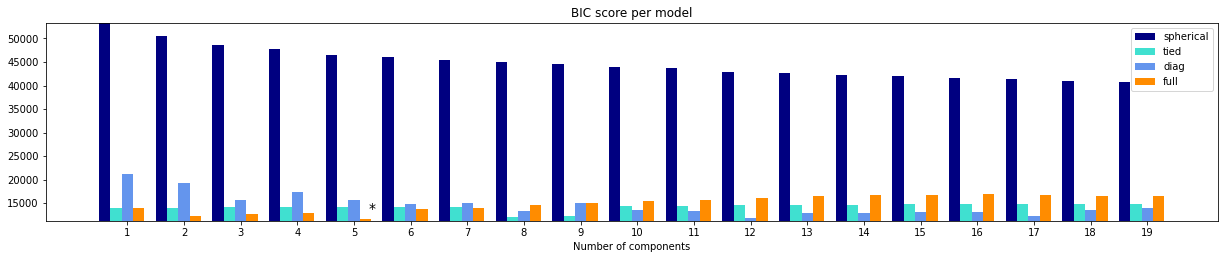

In [ ]:
X = df.copy()
X.drop(['Full Address'], axis=1, inplace=True)

lowest_bic = np.inf
bic = []
K = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']


for cv_type in cv_types:
  for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type=cv_type, max_iter=150, random_state=35)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    if bic[-1] < lowest_bic:
      lowest_bic = bic[-1]
      best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(21, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(K) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(K):
                                  (i + 1) * len(K)],
                        width=.2, color=color))
plt.xticks(K)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(K)) + .65 +\
    .2 * np.floor(bic.argmin() / len(K))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

#### Pickle model

In [ ]:
import pickle

In [ ]:
with ZipFile('models.zip', 'w') as myzip:
    pickle.dump(clf, open('GMM_model.pickle', 'wb'))
    myzip.write('GMM_model.pickle')
    os.remove('GMM_model.pickle')

####Unpickle (if needed)

In [ ]:
with ZipFile('models.zip', 'r') as myzip:
    clf = pickle.load(myzip.open('GMM_model.pickle'))

Best combo: full, 5 clusters

###Combine cluster information into dataset

In [ ]:
labeled_df = pd.DataFrame(data=clf.predict(X), columns=['Cluster'])
labeled_df = pd.concat([df.copy(), labeled_df], axis=1)
labeled_df

,ATT,TOWNH,TWINH,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit,Cluster
0,1,0,0,4095 Bonita Road 132,91902,2,2,1007,1970,310000,470,1950.0,1087.0,393.0,1
1,0,1,0,88 Fourth Ave 10,91910,3,2,1611,2004,399900,320,2550.0,1456.0,774.0,2
2,1,0,0,2167 Palo Alto Dr 133,91914,2,2,1061,2006,374000,127,2200.0,1394.0,679.0,1
3,0,1,0,2134 Cantata Dr. 36,91914,2,2,1061,2006,379000,358,2200.0,1356.0,486.0,1
4,1,0,0,280 Salinas Dr. 171,91914,2,2,1061,2006,378500,125,2240.0,1349.0,766.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0,1,0,7019 DEERHURST CT,92139,3,2,1381,1980,430000,134,2500.0,1524.0,842.0,2
177,1,0,0,2233 Manzana Way,92139,4,3,1701,1985,460000,235,2750.0,1690.0,825.0,2
178,0,1,0,24374 Larchmont Ct 69,92653,2,3,1288,1985,499000,320,2600.0,1590.0,690.0,1
179,1,0,0,25185 Via Terracina,92677,2,2,1113,1989,515000,310,2550.0,1803.0,437.0,1


In [ ]:
labeled_df.groupby(by=['Cluster']).count()

,ATT,TOWNH,TWINH,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit
Cluster,,,,,,,,,,,,,,
0,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,99,99,99,99,99,99,99,99,99,99,99,99,99,99
2,46,46,46,46,46,46,46,46,46,46,46,46,46,46
3,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [ ]:
labeled_df.groupby(by=['Cluster']).mean()

,ATT,TOWNH,TWINH,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit
Cluster,,,,,,,,,,,,,
0,0.000000,0.666667,0.333333,92048.500000,2.666667,2.333333,1259.166667,1997.166667,447946.500000,115.000000,2436.833333,1744.333333,577.500000
1,0.848485,0.151515,0.000000,92083.383838,2.000000,2.181818,1157.777778,1984.757576,461588.313131,374.606061,2475.838384,1650.919192,450.313131
2,0.652174,0.347826,0.000000,92056.369565,3.108696,2.543478,1350.217391,1986.717391,417725.934783,298.500000,2541.739130,1519.369565,723.869565
3,0.200000,0.800000,0.000000,92031.200000,2.800000,2.300000,1544.500000,1984.200000,532590.000000,301.300000,2723.400000,1913.300000,508.800000
4,0.700000,0.300000,0.000000,92118.450000,2.450000,2.000000,1100.950000,1979.100000,343294.850000,325.350000,2243.750000,1244.150000,674.250000


### Question: Where should an investor,  invest? What houses would you recommend they buy as an investment property?

Cluster number 2 and 4 seem to have the most benefit if an investor want to use it as a rent house. High rent, low HOA and low mortgage.

###Question: Using given listed houses, show the market trends, Using this market trends highlight the low , medium and high values houses.

If we just want to find the high value houses, cluster number 3 seems to have the most house value overall. Cluster 0 and 1 for medium value houses. Cluster 2 and 4 for low value houses.

###Question: Based on the data derive the  following: 

1. Most buyer interested houses
2. Average buyer interested houses
3. Less buyer interested houses

Although I can't tell which house is popular or not, I think it's just like the previous two questions. It depends on what are the buyer want to do with the house. If they want to use it as a rent house, then house in cluster number 2 and 4 suits them. If they want to use it as a way of banking money, cluster number 3 suits them the most. I'll talk about this more when I finish data amalgamation.

## Data amalgamation

Use linear regression to predict future housing price. Add the slope back to the dataset to indicate how to price will go in the future, the higher the better.

### Linear regression to find the slope

In [ ]:
def plot_linear_regression(data, y_name, XName, YName, x_range):
    linearRegression = LinearRegression()
    xAxis = data.index
    yAxis = data[y_name]

    x = np.array(list(map(lambda i : [i], xAxis)))
    linearRegression.fit(x, yAxis)

    xPlot = x_range
    yPlot = linearRegression.predict(np.array(list(map(lambda i : [i], xPlot))))

    line = plt.plot(xAxis,yAxis,'o')
    plt.setp(line, linewidth = 3.0)
    plt.plot(xPlot,yPlot)
    plt.xlabel(XName)
    plt.ylabel(YName)

    return linearRegression.coef_[0]

In [ ]:
ave_price_growth = {}

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date'], axis=1)
df_sub1.rename(columns={"Logan Heights": "92113", "Imperial Beach": "91932,91933,92154", "Mission Hills": "91345", "Mission Valley": "92108"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,92113,"91932,91933,92154",91345,92108
0,249634,392660,581678,290625
1,254732,396370,587827,293315
2,257309,404544,596196,301396
3,269281,422106,646806,309597
4,274899,439246,653416,321087
...,...,...,...,...
171,381411,563422,998693,438886
172,381556,561952,1020925,443002
173,386218,563394,1046276,445427
174,387534,555142,1040308,445022


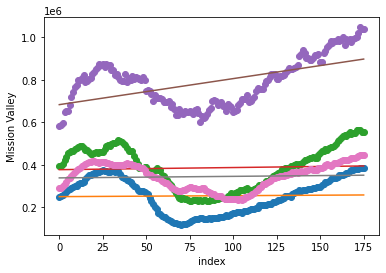

In [ ]:
ave_price_growth['92113'] = plot_linear_regression(df_sub1, '92113', 'index', 'Logan Heights', range(0,176))
ave_price_growth['91932'] = ave_price_growth['91933'] = ave_price_growth['92154'] = plot_linear_regression(df_sub1, '91932,91933,92154', 'index', 'Imperial Beach', range(0,176))
ave_price_growth['91345'] = plot_linear_regression(df_sub1, '91345', 'index', 'Mission Hills', range(0,176))
ave_price_growth['92108'] = plot_linear_regression(df_sub1, '92108', 'index', 'Mission Valley', range(0,176))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-Mira Mesa San Carlos Santee La Mesa-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date'], axis=1)
df_sub1.rename(columns={"Mira Mesa": "92126", "San Carlos": "94070", "Santee": "92071,92072", "La Mesa": "91941,91942,91943,91944"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,92126,94070,"92071,92072","91941,91942,91943,91944"
0,337352,363457,299773,360502
1,339735,367784,303084,365732
2,343617,372298,307406,370264
3,350507,385166,311946,378820
4,359000,394594,318158,389642
...,...,...,...,...
171,506687,537729,440255,504927
172,514167,541814,447372,507187
173,519353,544890,449120,508255
174,525487,545239,454627,513636


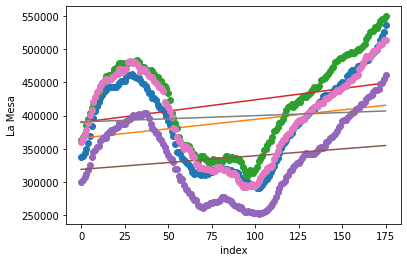

In [ ]:
ave_price_growth['92126'] = plot_linear_regression(df_sub1, '92126', 'index', 'Mira Mesa', range(0,176))
ave_price_growth['94070'] = plot_linear_regression(df_sub1, '94070', 'index', 'San Carlos', range(0,176))
ave_price_growth['92071'] = ave_price_growth['92072'] = plot_linear_regression(df_sub1, '92071,92072', 'index', 'Santee', range(0,176))
ave_price_growth['91941'] = ave_price_growth['91942'] = ave_price_growth['91943'] = ave_price_growth['91944'] = plot_linear_regression(df_sub1, '91941,91942,91943,91944', 'index', 'La Mesa', range(0,176))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-North Park Hillcrest University Heights Old Town-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date'], axis=1)
df_sub1.rename(columns={"North Park": "92104", "Hillcrest": "92103", "University Heights": "92116", "Old Town": "93561"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,92104,92103,92116,93561
0,339174,399630,360976,365838
1,336599,393673,359321,365838
2,343145,394296,359281,375856
3,354958,388064,370353,382064
4,363094,397239,391575,373750
...,...,...,...,...
171,593808,605492,600148,506981
172,609239,598620,592894,524646
173,609148,602502,592238,505227
174,607115,606803,606708,490403


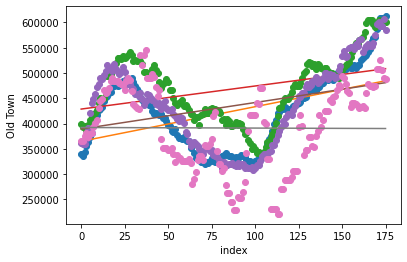

In [ ]:
ave_price_growth['92104'] = plot_linear_regression(df_sub1, '92104', 'index', 'North Park', range(0,176))
ave_price_growth['92103'] = plot_linear_regression(df_sub1, '92103', 'index', 'Hillcrest', range(0,176))
ave_price_growth['92116'] = plot_linear_regression(df_sub1, '92116', 'index', 'University Heights', range(0,176))
ave_price_growth['93561'] = plot_linear_regression(df_sub1, '93561', 'index', 'Old Town', range(0,176))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-Oceanside Carlsbad South Encinitas Solana Beach-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date'], axis=1)
df_sub1.rename(columns={"Oceanside": "92054,92056,92057,92058", "Carlsbad South": "92008,92009,92010,92011", "Encinitas": "92007,92024", "Solana Beach": "92075"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,"92054,92056,92057,92058","92008,92009,92010,92011","92007,92024",92075
0,343644,520410,624517,688178
1,347908,521824,635285,708944
2,354742,530114,639778,721270
3,364090,541371,661516,755938
4,371463,548449,679647,761735
...,...,...,...,...
171,498198,906144,1030731,1372048
172,502359,902121,1039863,1375418
173,503107,903692,1046538,1408842
174,506759,902505,1053044,1410942


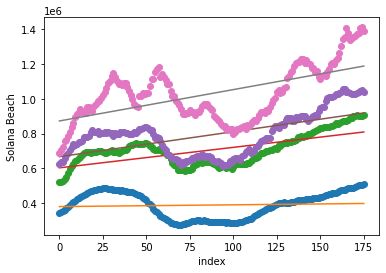

In [ ]:
ave_price_growth['92054'] = ave_price_growth['92056'] = ave_price_growth['92057'] = ave_price_growth['92058'] = plot_linear_regression(df_sub1, '92054,92056,92057,92058', 'index', 'Oceanside', range(0,176))
ave_price_growth['92008'] = ave_price_growth['92009'] = ave_price_growth['92010'] = ave_price_growth['92011'] = plot_linear_regression(df_sub1, '92008,92009,92010,92011', 'index', 'Carlsbad South', range(0,176))
ave_price_growth['92007'] = ave_price_growth['92024'] = plot_linear_regression(df_sub1, '92007,92024', 'index', 'Encinitas', range(0,176))
ave_price_growth['92075'] = plot_linear_regression(df_sub1, '92075', 'index', 'Solana Beach', range(0,176))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-Oceanside Downtown Clairemont Bay Park-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[30:188].reset_index().drop(['index', 'Date', 'Oceanside'], axis=1)
df_sub1.rename(columns={"Downtown": "90802,90813", "Clairemont": "92111", "Bay Park": "92110"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,"90802,90813",92111,92110
0,1150000,516705,643904
1,570214,514957,623426
2,588199,516373,637201
3,682344,517981,635873
4,641327,518296,653562
...,...,...,...
153,649558,582283,769470
154,653883,591427,787436
155,652605,596815,785519
156,649285,603649,798579


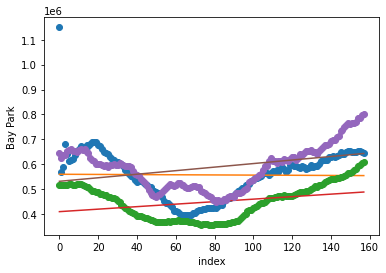

In [ ]:
ave_price_growth['90802'] = ave_price_growth['90813'] = plot_linear_regression(df_sub1, '90802,90813', 'index', 'Downtown', range(0,158))
ave_price_growth['92111'] = plot_linear_regression(df_sub1, '92111', 'index', 'Clairemont', range(0,158))
ave_price_growth['92110'] = plot_linear_regression(df_sub1, '92110', 'index', 'Bay Park', range(0,158))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-Oceanside La Jolla Pacific Beach Mission Beach-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date', 'Oceanside'], axis=1)
df_sub1.rename(columns={"La Jolla": "92037", "Pacific Beach": "92109", "Mission Beach": "94158,94107"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,92037,92109,"94158,94107"
0,1041792,511628,764197
1,1023623,524954,808826
2,1040822,534297,777960
3,1062020,543272,773904
4,1118685,559512,841964
...,...,...,...
171,1616695,876555,1343091
172,1609966,891012,1294123
173,1630024,886200,1319332
174,1633350,887780,1314412


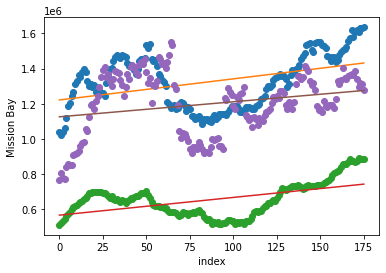

In [ ]:
ave_price_growth['92037'] = plot_linear_regression(df_sub1, '92037', 'index', 'La Jolla', range(0,176))
ave_price_growth['92109'] = plot_linear_regression(df_sub1, '92109', 'index', 'Pacific Beach', range(0,176))
ave_price_growth['94158'] = ave_price_growth['94107'] = plot_linear_regression(df_sub1, '94158,94107', 'index', 'Mission Bay', range(0,176))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-Rancho Bernardo Rancho Penasquitos Poway Scripps Ranch-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date'], axis=1)
df_sub1.rename(columns={"Rancho Bernardo": "92128", "Rancho Penasquitos": "92129", "Poway": "92064", "Scripps Ranch": "92131"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,92128,92129,92064,92131
0,427314,421648,591547,502004
1,430550,426340,611702,508178
2,439585,438752,633924,520800
3,450077,449172,665040,528194
4,460746,464534,676076,535685
...,...,...,...,...
171,677577,669651,836365,821077
172,683904,676525,832425,816903
173,686218,685817,829476,815866
174,693302,692216,835187,833278


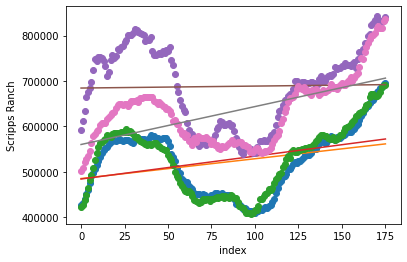

In [ ]:
ave_price_growth['92128'] = plot_linear_regression(df_sub1, '92128', 'index', 'Rancho Bernardo', range(0,176))
ave_price_growth['92129'] = plot_linear_regression(df_sub1, '92129', 'index', 'Rancho Penasquitos', range(0,176))
ave_price_growth['92064'] = plot_linear_regression(df_sub1, '92064', 'index', 'Poway', range(0,176))
ave_price_growth['92131'] = plot_linear_regression(df_sub1, '92131', 'index', 'Scripps Ranch', range(0,176))

In [ ]:
df_sub1 = pd.read_csv('Average Sales Price-San Marcos Vista Lake San Marcos Fallbrook-20180905.csv')
df_sub1.columns = df_sub1.iloc[11]
df_sub1 = df_sub1[12:188].reset_index().drop(['index', 'Date'], axis=1)
df_sub1.rename(columns={"San Marcos": "92069,92079,92096", "Vista": "92081,92083,92084,92085", "Lake San Marcos": "92078", "Fallbrook": "92028"}, inplace=True)
df_sub1 = df_sub1.astype(int)
df_sub1

11,"92069,92079,92096","92081,92083,92084,92085",92078,92028
0,368284,354900,376130,446350
1,370635,359455,381183,457641
2,377909,366696,380673,466582
3,391593,378359,393797,483144
4,400248,387808,414121,495899
...,...,...,...,...
171,562869,500518,528957,586786
172,568656,502569,521784,589109
173,572620,507828,525799,591595
174,572581,514926,540505,601009


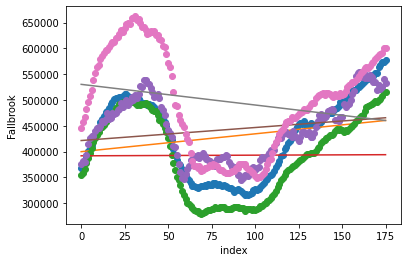

In [ ]:
ave_price_growth['92069'] = ave_price_growth['92079'] = ave_price_growth['92096'] = plot_linear_regression(df_sub1, '92069,92079,92096', 'index', 'San Marcos', range(0,176))
ave_price_growth['92081'] = ave_price_growth['92083'] = ave_price_growth['92084'] = ave_price_growth['92085'] = plot_linear_regression(df_sub1, '92081,92083,92084,92085', 'index', 'Vista', range(0,176))
ave_price_growth['92078'] = plot_linear_regression(df_sub1, '92078', 'index', 'Lake San Marcos', range(0,176))
ave_price_growth['92028'] = plot_linear_regression(df_sub1, '92028', 'index', 'Fallbrook', range(0,176))

###Relate the slope with their belonged zip code

In [ ]:
ave_price_growth

{'92113': 44.72117543473477,
 '91932': 99.70693484481632,
 '91933': 99.70693484481632,
 '92154': 99.70693484481632,
 '91345': 1222.361937046005,
 '92108': 71.92030376403257,
 '92126': 283.29694915254237,
 '94070': 339.1342559982391,
 '92071': 205.50297490644954,
 '92072': 205.50297490644954,
 '91941': 93.63971494607091,
 '91942': 93.63971494607091,
 '91943': 93.63971494607091,
 '91944': 93.63971494607091,
 '92104': 683.8876843495489,
 '92103': 456.2428010125468,
 '92116': 523.3999141536431,
 '93561': -11.63392361875413,
 '92054': 101.55119194364951,
 '92056': 101.55119194364951,
 '92057': 101.55119194364951,
 '92058': 101.55119194364951,
 '92008': 1175.673438256659,
 '92009': 1175.673438256659,
 '92010': 1175.673438256659,
 '92011': 1175.673438256659,
 '92007': 1435.2770834250498,
 '92024': 1435.2770834250498,
 '92075': 1800.7410114461818,
 '90802': -33.79583910770177,
 '90813': -33.79583910770177,
 '92111': 501.56194256106613,
 '92110': 711.5551198051594,
 '92037': 1199.9718787145057,

### Question: Based on the data derive the  following: 

1. Most buyer interested houses
2. Average buyer interested houses
3. Less buyer interested houses

We can now see the less buyer interested houses may be the houses located in the zip code 92028 and those who's growth rate is lower than 150.

Average buyer could be those who's growth rate is between 200 and 700.

And most buyter would probably looking for those who's growth rate is higher than 700.

###Add the house value growth rate back to dataset according to the zip code

In [ ]:
growth = [None for i in range(181)]

In [ ]:
for i, v in enumerate(df.iterrows()):
    if str(v[1]['Zip']) in ave_price_growth:
        growth[i] = ave_price_growth[str(v[1]['Zip'])]

In [ ]:
df_temp = df.copy()
df_temp['Growth'] = growth
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ATT           181 non-null    uint8  
 1   TOWNH         181 non-null    uint8  
 2   TWINH         181 non-null    uint8  
 3   Full Address  181 non-null    object 
 4   Zip           181 non-null    int64  
 5   Beds          181 non-null    int64  
 6   TotB          181 non-null    int64  
 7   EstSF         181 non-null    int64  
 8   YrBlt         181 non-null    int64  
 9   ListPrice     181 non-null    int64  
 10  HOA           181 non-null    int64  
 11  Rent          181 non-null    float64
 12  Mortgage      181 non-null    float64
 13  Benefit       181 non-null    float64
 14  Growth        98 non-null     float64
dtypes: float64(4), int64(7), object(1), uint8(3)
memory usage: 17.6+ KB


In [ ]:
df_temp.dropna(inplace=True)
df_temp

,ATT,TOWNH,TWINH,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit,Growth
7,0,1,0,4412 Palm Ave. 2,91941,3,3,1459,2018,520000,0,2244.0,1892.0,352.0,93.639715
8,0,1,0,4414 Palm Ave. 3,91941,3,3,1459,2018,525000,374,2100.0,1892.0,-166.0,93.639715
9,0,1,0,3880 Murray Hill Rd,91941,3,2,1398,1991,525000,260,2795.0,1860.0,675.0,93.639715
10,1,0,0,5700 Baltimore Dr 71,91942,2,2,1038,1976,315000,416,2200.0,1209.0,575.0,93.639715
11,0,1,0,5700 Baltimore Dr 241,91942,2,3,1068,1976,325000,416,2200.0,1186.0,598.0,93.639715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,0,0,7369 Calle Cristobal 206,92126,2,2,1114,1991,449900,344,2396.0,1702.0,350.0,283.296949
164,1,0,0,10512 Caminito Westchester,92126,2,2,1195,1979,450000,313,2395.0,1645.0,437.0,283.296949
165,1,0,0,13338 Via Magdalena 1,92129,2,2,1026,2003,520000,273,2300.0,1824.0,203.0,504.010701
167,1,0,0,9917 Scripps Westview Way 120,92131,2,2,1052,1985,410000,295,2250.0,1539.0,416.0,835.662831


### See what houses have the higher growth value

In [ ]:
df_temp.sort_values(by='Growth', ascending=False).head(30)

,ATT,TOWNH,TWINH,Full Address,Zip,Beds,TotB,EstSF,YrBlt,ListPrice,HOA,Rent,Mortgage,Benefit,Growth
49,1,0,0,6575 Paseo Del Norte F,92011,2,2,1060,1974,539000,450,2500.0,1745.0,305.0,1175.673438
32,1,0,0,2349 Caringa Way 2,92009,2,3,1533,1975,485000,318,2700.0,1642.0,740.0,1175.673438
43,0,1,0,2353 Caringa Way 1,92009,2,3,1504,1975,549900,330,2750.0,2096.0,324.0,1175.673438
42,0,1,0,7727 Caminito Monarca 108,92009,2,3,1250,1990,534000,330,2700.0,1968.0,402.0,1175.673438
41,0,1,0,2319 Caringa Way 58,92009,2,2,1536,1975,535000,385,2800.0,1949.0,466.0,1175.673438
40,0,1,0,2323 Caringa Way 16,92009,2,2,1536,1975,535000,385,2800.0,1967.0,448.0,1175.673438
39,0,1,0,2504 Navarra Drive 206,92009,2,3,1392,1973,512499,560,2800.0,1815.0,425.0,1175.673438
38,1,0,0,2311 Caringa Way 44,92009,2,2,1536,1975,524000,385,2750.0,1814.0,551.0,1175.673438
37,1,0,0,7083 Estrella De Mar Rd C,92009,2,2,1372,1966,514999,415,2700.0,1787.0,498.0,1175.673438
36,1,0,0,7087 Estrella De Mar Rd B,92009,2,2,1372,1966,514999,415,2700.0,1931.0,354.0,1175.673438


###Question: Find the golden cluster for investment : lowest cost house that has the greatest probability of price increase in the next few years.

According to the table above, we can see that house index number 28 is the cheapest, yet, having the most value growing rate. All those houses having the same growing rate are from similar area, so their price doesn't vary that much.

###Question: If you buy a house today how much will the price change( profit or loss, increase or decrease) after 2 years of your purchase?

Say we bought the house number 110, which is the last entity in the above table. The value is 499000, after two years, which is 24 months, according to the growth, the value will probably be about 499000+24*711.56 = 516077.44